### Challenge Data Scientist - Neuralworks
#### Problema a resolver
Predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL).

#### Dependencias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import missingno as msno
import plotly.express as px

#### Distribución de los datos
Importamos los datos y hacemos los primeros chequeos de la distribución, completitud y tipo de los datos.

In [40]:
df = pd.read_csv('dataset_SCL.csv', dtype={'Fecha-I':'str', 'Vlo-I': 'str', 'Ori-I': 'str', 'Des-I':'str', 'Emp-I': 'str',
'Fecha-O': 'str', 'Vlo-O': 'str', 'Ori-O': 'str','Des-O': 'str', 'Emp-O': 'str', 
'DIA': 'int', 'MES': 'int','AÑO': 'int', 'DIANOM': 'str', 
'TIPOVUELO': 'str', 'OPERA': 'str', 'SIGLAORI': 'str', 'SIGLADES': 'str'},parse_dates=['Fecha-I','Fecha-O'])

Revisamos la completitud del dataset con `msno`:

<AxesSubplot:>

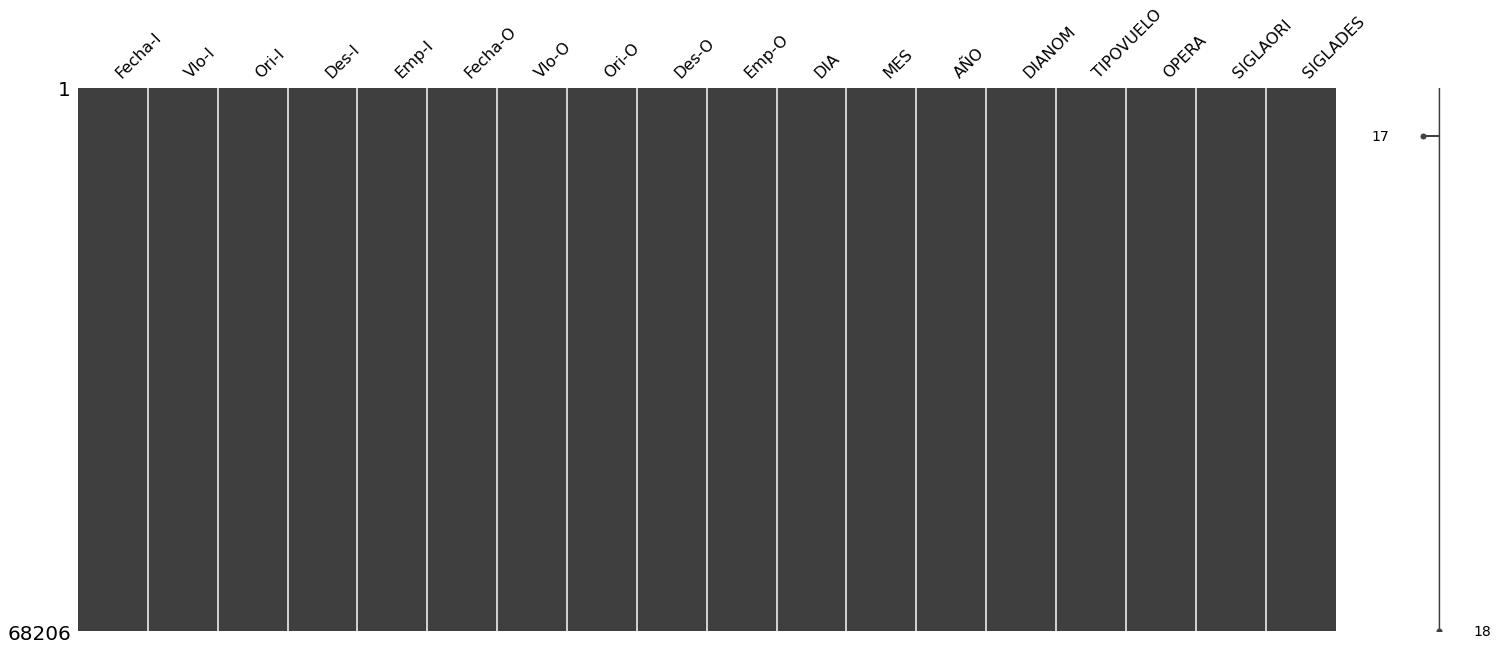

In [43]:
msno.matrix(df)

Notamos que hay un registro con valor nulo, por lo que exploramos en detalle:

In [44]:
df[df.isna().any(axis=1)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Revisamos si hay otros vuelos con las mismas características con el que podríamos inferir qué es ese valor faltane para imputarlo.

In [45]:
df.query('OPERA == "Latin American Wings" & SIGLADES == "Lima" & `Emp-O` == "56R" & `Vlo-I` == "200"', engine = 'python')

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6067,2017-01-18 11:00:00,200,SCEL,SPJC,LAW,2017-01-18 11:06:00,200,SCEL,SPJC,56R,18,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Llegando a esto, podríamos tomar dos caminos: 
1) Inputar el valor de Vlo-O con "200", asumiendo sin mayor contexto que sería lo correcto
2) Descartar el dato dado que es ínfimo respecto al resto del dataset
3) Consultar a la contraparte correspondiente que emitió el dato.

Dada la agilidad y naturaleza del ejercicio, lo más práctico sería 2).

In [46]:
df.drop(6068, inplace=True)

Con lo anterior listo, podemos ir directo a ver las distribuciones de los datos. Notamos eso sí, que `Vlo-I` y `Vlo-O` están interpretadas en el dataframe como `object` y no como `int`

In [47]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int32
MES                   int32
AÑO                   int32
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

Haciendo un sample nos damos cuenta que hay algunos valores que son enteros y se interpretaron con un formato decimal, por lo que tenemos que hacernos cargo de esos casos borde.

In [8]:
df[['Vlo-I', 'Vlo-O']].sample(10)

,Vlo-I,Vlo-O
54696,632,632
66004,324,324.0
35494,174,174
40906,118,118
53489,302,302
54496,532,532
41601,215,215
19324,118,118
19413,126,126
17672,174,174


Explorando los datos, nos damos cuenta también de que hay números de vuelo con letras que no son necesariamente errores, entonces hay que tener cuidado al hacer la transformación de los valores mencionados anteriormente.

Por lo tanto, buscamos todos los valores "convertibles a numérico" y buscamos con un Regex si contienen un decimal dentro de su cadena, reemplazándolo por un string vacío, de esta manera asegurándonos que 324 y 324.0 sean lo mismo para los análisis y modelos que usemos después.

In [48]:
df.loc[pd.to_numeric(df['Vlo-I'], errors='coerce').notnull(), 'Vlo-I'] = pd.to_numeric(df['Vlo-I'], errors='coerce').astype('int', errors='ignore').astype('str').replace('\.\d+', '', regex=True)
df.loc[pd.to_numeric(df['Vlo-O'], errors='coerce').notnull(), 'Vlo-O'] = pd.to_numeric(df['Vlo-O'], errors='coerce').astype('int', errors='ignore').astype('str').replace('\.\d+', '', regex=True)

Nos aseguramos que el error haya desaparecido:

In [53]:
df.query("`Vlo-I` == '324' & `Vlo-O` == '324.0'", engine = "python")

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


Con el wrangling listo, podemos partir con la gráfica de las distribuciones de los datos:

#### Generación de columnas adicionales

#### Exploración de la distribución del target por categoría

#### Implementación de modelo(s) de machine learning

#### Evaluación de los modelos de machine learning